# Zillow Clustering Project

In [1]:
import pandas as pd
import seaborn as sns
import acquire
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression

# Acquire

## What does the data set look like?

In [2]:
df = acquire.zillow_data()
df

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,17173851,NaN,NaN,261.0,NaN,None,NaN,NaN,787,NaN,...,389.0,0.088469,2017-01-03,None,None,None,None,Single Family Residential,None,None
1,10821119,NaN,NaN,261.0,2.0,None,NaN,NaN,1702,NaN,...,402.0,0.025629,2017-01-03,None,None,None,Central,Single Family Residential,None,None
2,11007640,NaN,NaN,261.0,2.0,None,NaN,1.0,2412,NaN,...,2699.0,0.020360,2017-01-12,Central,None,None,Central,Single Family Residential,None,None
3,11457850,NaN,NaN,261.0,7.0,None,NaN,NaN,3770,NaN,...,2229.0,0.054233,2017-01-11,None,None,None,Floor/Wall,Single Family Residential,None,None
4,12591550,NaN,NaN,261.0,2.0,None,NaN,NaN,8197,NaN,...,3038.0,-0.016170,2017-01-13,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,12885754,NaN,NaN,261.0,7.0,None,NaN,NaN,2976765,NaN,...,42657.0,0.515289,2017-06-01,None,None,None,Floor/Wall,Single Family Residential,None,None
52438,13869000,NaN,NaN,261.0,NaN,None,NaN,NaN,2977815,NaN,...,32297.0,0.009512,2017-05-02,None,None,None,None,Single Family Residential,None,None
52439,13890509,NaN,NaN,261.0,NaN,None,NaN,NaN,2977914,NaN,...,28537.0,-0.031048,2017-04-21,None,None,None,None,Single Family Residential,None,None
52440,17246810,NaN,NaN,261.0,NaN,None,NaN,NaN,2980979,NaN,...,8396.0,-0.031665,2017-02-07,None,None,None,None,Single Family Residential,None,None


## Prepare

### Now that we have the dataset now we take a deeper look into it

What do the empty values look like?

In [3]:
df.isnull().sum()

parcelid                      0
typeconstructiontypeid    52366
storytypeid               52395
propertylandusetypeid         0
heatingorsystemtypeid     18507
                          ...  
buildingclassdesc         52442
heatingorsystemdesc       18507
propertylandusedesc           0
storydesc                 52395
typeconstructiondesc      52366
Length: 69, dtype: int64

There are many columns that have many empty values, let's get rid of them for the MVP.

In [4]:
df = acquire.handle_missing_values(df,prop_required_column=.9,prop_required_row=0)
df

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,17173851,261.0,787,2.0,4.0,2.0,1848.0,1848.0,6111.0,2.0,...,47193.0,64712.0,2016.0,17519.0,781.00,6.111004e+13,389.0,0.088469,2017-01-03,Single Family Residential
1,10821119,261.0,1702,2.0,2.0,2.0,1430.0,1430.0,6037.0,2.0,...,107511.0,381638.0,2016.0,274127.0,4692.27,6.037131e+13,402.0,0.025629,2017-01-03,Single Family Residential
2,11007640,261.0,2412,2.0,3.0,2.0,1572.0,1572.0,6037.0,2.0,...,144802.0,305307.0,2016.0,160505.0,3887.80,6.037106e+13,2699.0,0.020360,2017-01-12,Single Family Residential
3,11457850,261.0,3770,2.0,3.0,2.0,1412.0,1412.0,6037.0,2.0,...,38700.0,93146.0,2016.0,54446.0,1246.18,6.037276e+13,2229.0,0.054233,2017-01-11,Single Family Residential
4,12591550,261.0,8197,2.0,3.0,2.0,1352.0,1352.0,6037.0,2.0,...,96651.0,482242.0,2016.0,385591.0,6098.62,6.037544e+13,3038.0,-0.016170,2017-01-13,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,12885754,261.0,2976765,1.0,3.0,1.0,1021.0,1021.0,6037.0,1.0,...,93397.0,200214.0,2016.0,106817.0,2629.33,6.037403e+13,42657.0,0.515289,2017-06-01,Single Family Residential
52438,13869000,261.0,2977815,2.0,4.0,2.0,1554.0,1554.0,6059.0,2.0,...,135043.0,215695.0,2016.0,80652.0,2607.04,6.059002e+13,32297.0,0.009512,2017-05-02,Single Family Residential
52439,13890509,261.0,2977914,4.0,3.0,4.0,2880.0,2880.0,6059.0,4.0,...,271027.0,1389962.0,2016.0,1118935.0,14935.72,6.059063e+13,28537.0,-0.031048,2017-04-21,Single Family Residential
52440,17246810,261.0,2980979,2.5,3.0,2.5,1376.0,1376.0,6111.0,2.0,...,201839.0,403678.0,2016.0,201839.0,4880.90,6.111008e+13,8396.0,-0.031665,2017-02-07,Single Family Residential


With this function I drop columns that are <90% empty, while they may hold valuable information. They will not be helpful for my MVP.

In [5]:
df.isnull().sum()

parcelid                           0
propertylandusetypeid              0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                138
calculatedfinishedsquarefeet      83
finishedsquarefeet12             248
fips                               0
fullbathcnt                      138
latitude                           0
longitude                          0
lotsizesquarefeet                369
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1037
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        117
structuretaxvaluedollarcnt        85
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              124
id                                 1
l

## This is enormous I have cut my dataset in HALF!!!!!!!
> - 52442 rows
> - 27854 rows

In [6]:
df.logerror.describe()

count    52441.000000
mean         0.018298
std          0.177501
min         -4.655420
25%         -0.024639
50%          0.007011
75%          0.040692
max          5.262999
Name: logerror, dtype: float64

> This is where the crux of where my investigation starts, since we want logerror I figure it be best that I focus in on it. To do this I have found the middle number of the 25% interval as well as the 75% interval. Which came out to around 0.035 To keep as many entries in tact as possible I bring it down to 0.03. This is the minimum. When looking for the cieling I had noticed that the top 20 entries of logerror were skewing the data the most. Setting the cieling to 2.5 cuts out about 40 entries. 40 out of 27 thousand is a drop in the bucket.

In [7]:
df = acquire.takeout_outliers1(df)
df

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,17173851,261.0,787,2.0,4.0,2.0,1848.0,1848.0,6111.0,2.0,...,47193.0,64712.0,2016.0,17519.0,781.00,6.111004e+13,389.0,0.088469,2017-01-03,Single Family Residential
3,11457850,261.0,3770,2.0,3.0,2.0,1412.0,1412.0,6037.0,2.0,...,38700.0,93146.0,2016.0,54446.0,1246.18,6.037276e+13,2229.0,0.054233,2017-01-11,Single Family Residential
5,12755884,261.0,8864,1.0,3.0,1.0,900.0,900.0,6037.0,1.0,...,51376.0,101313.0,2016.0,49937.0,1606.54,6.037553e+13,1192.0,0.442837,2017-01-06,Single Family Residential
6,13983750,261.0,10930,1.5,2.0,1.5,1213.0,1213.0,6059.0,1.0,...,47458.0,431697.0,2016.0,384239.0,5451.26,6.059042e+13,3247.0,0.087099,2017-01-17,Single Family Residential
8,14399561,261.0,12462,3.0,4.0,3.0,2834.0,2834.0,6059.0,3.0,...,398523.0,943142.0,2016.0,544619.0,9482.12,6.059063e+13,2883.0,0.032578,2017-01-13,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12087743,261.0,2973484,1.0,3.0,1.0,1539.0,1539.0,6037.0,1.0,...,21099.0,44056.0,2016.0,22957.0,595.93,6.037186e+13,31255.0,0.175492,2017-04-28,Single Family Residential
52437,12885754,261.0,2976765,1.0,3.0,1.0,1021.0,1021.0,6037.0,1.0,...,93397.0,200214.0,2016.0,106817.0,2629.33,6.037403e+13,42657.0,0.515289,2017-06-01,Single Family Residential
52439,13890509,261.0,2977914,4.0,3.0,4.0,2880.0,2880.0,6059.0,4.0,...,271027.0,1389962.0,2016.0,1118935.0,14935.72,6.059063e+13,28537.0,-0.031048,2017-04-21,Single Family Residential
52440,17246810,261.0,2980979,2.5,3.0,2.5,1376.0,1376.0,6111.0,2.0,...,201839.0,403678.0,2016.0,201839.0,4880.90,6.111008e+13,8396.0,-0.031665,2017-02-07,Single Family Residential


In [8]:
df.logerror.describe()

count    27854.000000
mean         0.031684
std          0.227680
min         -2.406257
25%         -0.054390
50%          0.037564
75%          0.079115
max          2.479045
Name: logerror, dtype: float64

With the function working we can now continue the exploration.

In [9]:
df = acquire.drop_cat_columns(df)
# train_scaled, validate_scaled, test_scaled = acquire.splitmoreways(train, validate, test)
df
#so now that this functions work then what?

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,261.0,2.0,4.0,2.0,1848.0,1848.0,2.0,34153345.0,-119194015.0,11396.0,6.111004e+07,6.0,1952.0,47193.0,64712.0,17519.0,781.00,6.111004e+13,0.088469
3,261.0,2.0,3.0,2.0,1412.0,1412.0,2.0,33962085.0,-118393253.0,6000.0,6.037276e+07,0.0,1941.0,38700.0,93146.0,54446.0,1246.18,6.037276e+13,0.054233
5,261.0,1.0,3.0,1.0,900.0,900.0,1.0,33899030.0,-118081889.0,3402.0,6.037553e+07,0.0,1946.0,51376.0,101313.0,49937.0,1606.54,6.037553e+13,0.442837
6,261.0,1.5,2.0,1.5,1213.0,1213.0,1.0,33462918.0,-117658144.0,4592.0,6.059042e+07,5.0,1956.0,47458.0,431697.0,384239.0,5451.26,6.059042e+13,0.087099
8,261.0,3.0,4.0,3.0,2834.0,2834.0,3.0,33556040.0,-117724900.0,4339.0,6.059063e+07,0.0,1999.0,398523.0,943142.0,544619.0,9482.12,6.059063e+13,0.032578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,261.0,1.0,3.0,1.0,1539.0,1539.0,1.0,34128214.0,-118229179.0,6996.0,6.037186e+07,0.0,1927.0,21099.0,44056.0,22957.0,595.93,6.037186e+13,0.175492
52437,261.0,1.0,3.0,1.0,1021.0,1021.0,1.0,34041973.0,-117761243.0,6243.0,6.037403e+07,0.0,1948.0,93397.0,200214.0,106817.0,2629.33,6.037403e+13,0.515289
52439,261.0,4.0,3.0,4.0,2880.0,2880.0,4.0,33624412.0,-117921232.0,5216.0,6.059063e+07,5.0,2001.0,271027.0,1389962.0,1118935.0,14935.72,6.059063e+13,-0.031048
52440,261.0,2.5,3.0,2.5,1376.0,1376.0,2.0,34253728.0,-118732673.0,5041.0,6.111008e+07,5.0,1986.0,201839.0,403678.0,201839.0,4880.90,6.111008e+13,-0.031665


### Addressing nulls
Since so much of the data has been cut off I must focus on saving what I can. There are many valuable entries that have just some columns missing. So to keep them around I had filled in the empty values with zeros.

In [10]:
df = df.fillna(0)
df.shape

(27854, 19)

From this edited list now I split before exploring

In [11]:
train, validate, test = acquire.traintestsplit(df)
train, validate, test

(       propertylandusetypeid  bathroomcnt  bedroomcnt  calculatedbathnbr  \
 40731                  261.0          1.0         3.0                1.0   
 1059                   261.0          1.0         3.0                1.0   
 48642                  261.0          2.0         4.0                2.0   
 42603                  261.0          2.0         3.0                2.0   
 17181                  261.0          2.0         3.0                2.0   
 ...                      ...          ...         ...                ...   
 39497                  261.0          1.0         2.0                1.0   
 22243                  261.0          1.0         4.0                1.0   
 5965                   261.0          3.0         3.0                3.0   
 51844                  261.0          3.0         4.0                3.0   
 21684                  261.0          2.0         3.0                2.0   
 
        calculatedfinishedsquarefeet  finishedsquarefeet12  fullbathcnt  \

# this is where i am going to pull explore material to fill in for my final notebook

## Clustering

In [12]:
#this function is suppoused to give me scaled versions of my stuff
train_scaled, validate_scaled, test_scaled = acquire.splitmoreways(train, validate, test)
train_scaled, validate_scaled, test_scaled

(       propertylandusetypeid  bathroomcnt  bedroomcnt  calculatedbathnbr  \
 40731                  261.0     0.090909         0.3           0.090909   
 1059                   261.0     0.090909         0.3           0.090909   
 48642                  261.0     0.181818         0.4           0.181818   
 42603                  261.0     0.181818         0.3           0.181818   
 17181                  261.0     0.181818         0.3           0.181818   
 ...                      ...          ...         ...                ...   
 39497                  261.0     0.090909         0.2           0.090909   
 22243                  261.0     0.090909         0.4           0.090909   
 5965                   261.0     0.272727         0.3           0.272727   
 51844                  261.0     0.272727         0.4           0.272727   
 21684                  261.0     0.181818         0.3           0.181818   
 
        calculatedfinishedsquarefeet  finishedsquarefeet12  fullbathcnt  \

What do the clusters of logerror look like? What is best amount of clusters for logerror

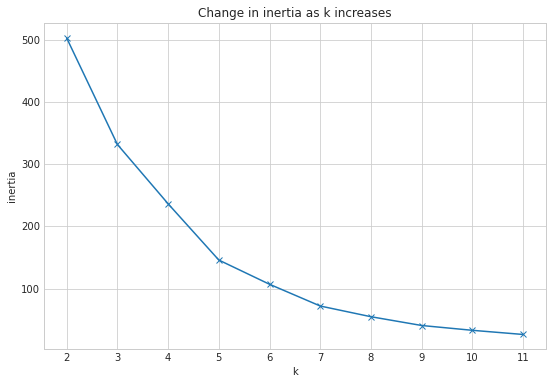

In [13]:
with plt.style.context('seaborn-whitegrid'):
    X = train_scaled[["logerror"]]
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

> 5, 6, 7 clusters

In [14]:
#label what we want clustered
X = train_scaled[["logerror"]]
#get the thing
kmeans = KMeans(n_clusters=6)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['cluster'] = kmeans.predict(X)

[4 0 0 ... 3 4 0]


What does that look like?

<AxesSubplot:xlabel='cluster', ylabel='logerror'>

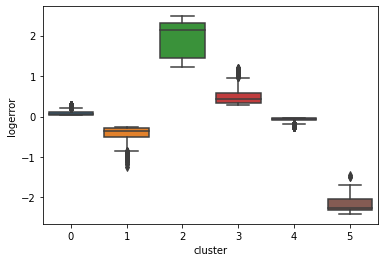

In [15]:
sns.boxplot(x="cluster", y="logerror", data=train)

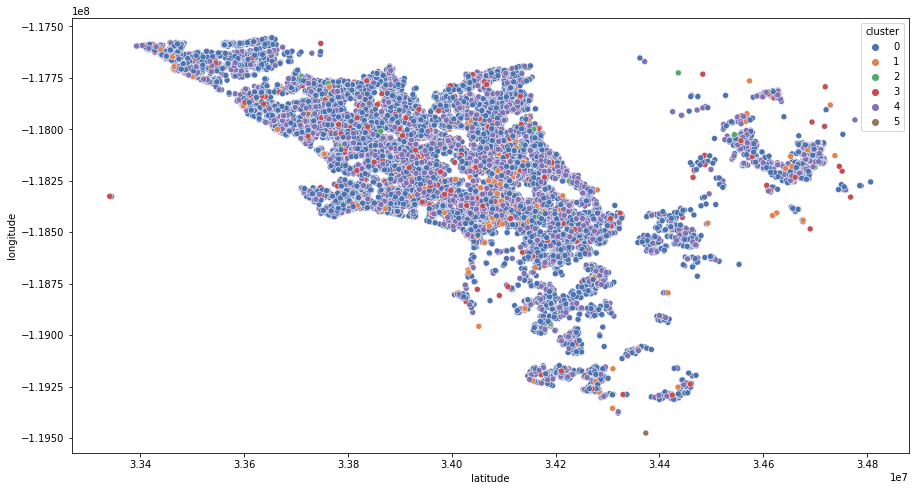

In [16]:
sns.scatterplot(x=train.latitude,y=train.longitude, hue=train.cluster, palette="deep")
plt.gcf().set_size_inches(15, 8)

This graph is a little hard to read I am going to bring the cluster amount down to 4

In [17]:
#label what we want clustered
X = train_scaled[["longitude","latitude"]]
#get the thing
kmeans = KMeans(n_clusters=6)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['longlat'] = kmeans.predict(X)

[0 1 5 ... 0 4 5]


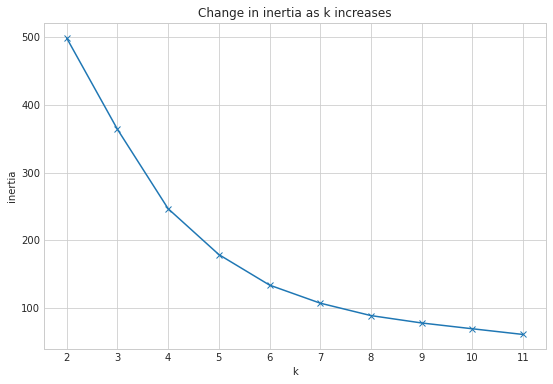

In [18]:
with plt.style.context('seaborn-whitegrid'):
    X = train_scaled[["longitude","latitude"]]
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 6 columns for the long and lats
What I need to look up and understand is how I can make these into their own columns, alias them first maybe

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

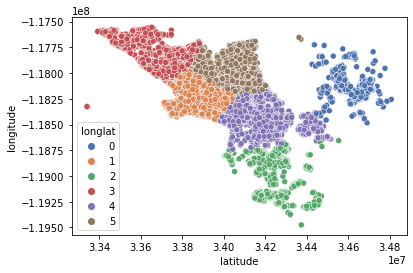

In [19]:
#wow okay it  even splits up the map to how many clusters I want
sns.scatterplot(x=train.latitude,y=train.longitude, hue=train.longlat, palette="deep")
#not very helpful to current scope/range but nice to look at

Ignore the above clustering from here I should bring in my top 5

## scaling

# Select K-best determined the following list of leading features

In [20]:
#as in bring in the select k-best
# parameters: f_regression stats test, give me 13 features
f_selector = SelectKBest(f_regression, k=19)

# find the top 8 X's correlated with y
f_selector.fit(train_scaled, train.logerror)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature
#these features also are great drivers for taxvaluedolarcnt which is then used in the zestimate

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


['propertylandusetypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror']

In [21]:
train_scaled.propertylandusetypeid

40731    261.0
1059     261.0
48642    261.0
42603    261.0
17181    261.0
         ...  
39497    261.0
22243    261.0
5965     261.0
51844    261.0
21684    261.0
Name: propertylandusetypeid, Length: 15598, dtype: float64

Need to check with elbow method to find optimal cluster amount

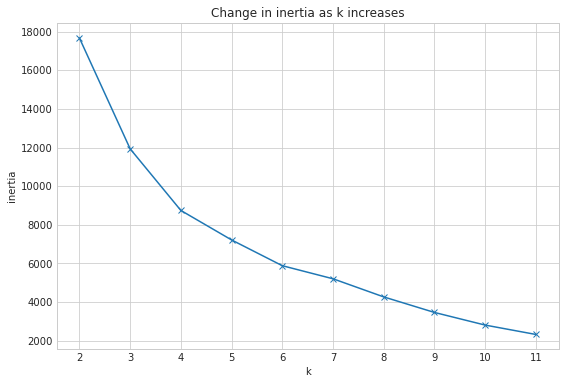

In [22]:
with plt.style.context('seaborn-whitegrid'):
    X = train[["bathroomcnt","bedroomcnt"]]
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Going with 7 clusters for bed and bath

In [23]:
#now that longitude and latitude are zoned what can
#lemme cluster between bed and baths
#label what we want clustered
X = train[["bathroomcnt","bedroomcnt"]]
#get the thing
kmeans = KMeans(n_clusters=7)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['bednbath'] = kmeans.predict(X)

[5 5 2 ... 4 6 3]


<AxesSubplot:xlabel='bedroomcnt', ylabel='bathroomcnt'>

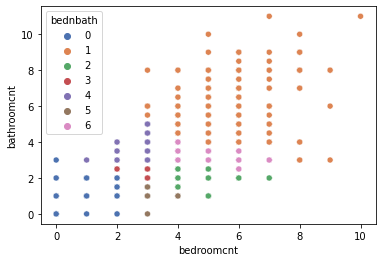

In [24]:
sns.scatterplot(x=train.bedroomcnt, y=train.bathroomcnt, hue=train.bednbath, palette="deep")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

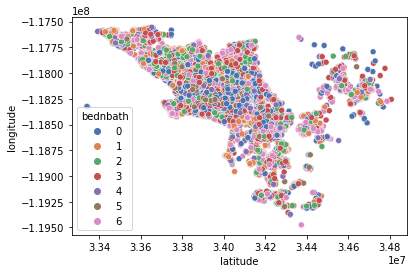

In [25]:
sns.scatterplot(x=train.latitude, y=train.longitude, hue=train.bednbath, palette="deep")

What is it exactly that I am looking for?

What is it that I need perciously?

Okay so this is gonna sound a little dumb but like let's make a cluster of all the clusters I want 

These will include:
- long lat
- bed bath

In [26]:
#the methodology for the method described above will be to run a select-K best model and pull my most heavy features

<b>
      <s>bathroomcntbedroomcnt</s>
 'calculatedbathnbr',
 <s>calculatedfinishedsquarefeet</s>
 'finishedsquarefeet12',
 'fullbathcnt',
     <s>latitudelongitude</s>
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'cluster',
 'zones'</b>

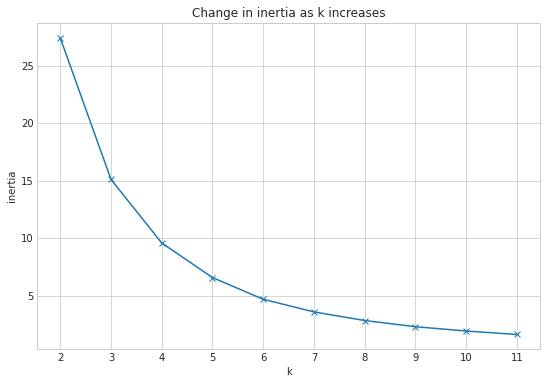

In [29]:
# calculatedfinishedsquarefeet clusters
with plt.style.context('seaborn-whitegrid'):
    X = train_scaled[["calculatedfinishedsquarefeet"]]
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [30]:
#now that longitude and latitude are zoned what can
#lemme cluster between bed and baths
#label what we want clustered
X = train[["calculatedfinishedsquarefeet"]]
#get the thing
kmeans = KMeans(n_clusters=6)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['squarefeet'] = kmeans.predict(X)
#going with 6

[1 1 6 ... 3 3 6]


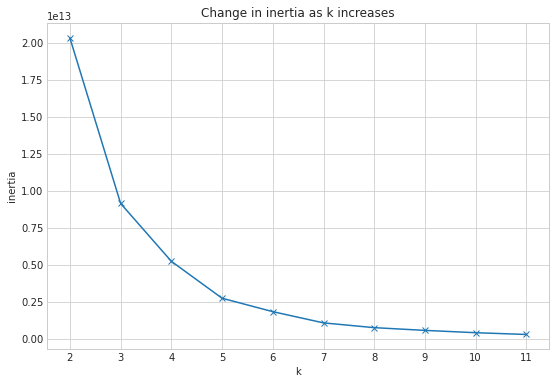

In [28]:
with plt.style.context('seaborn-whitegrid'):
    X = train_scaled[["lotsizesquarefeet"]]
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #going with 5

In [33]:
X = train[["lotsizesquarefeet"]]
#get the thing
kmeans = KMeans(n_clusters=5)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['lotsize'] = kmeans.predict(X)

[0 0 0 ... 0 0 0]


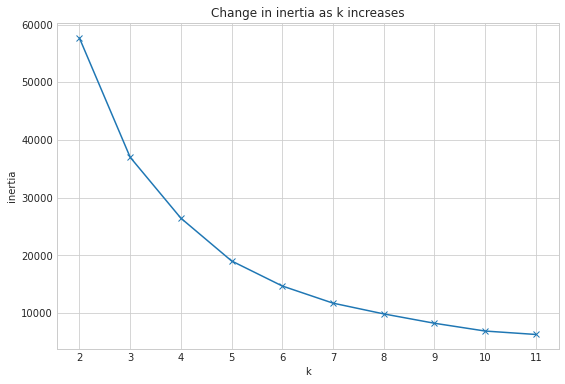

In [34]:
with plt.style.context('seaborn-whitegrid'):
    X = train[["squarefeet","lotsize","bednbath","longlat"]]
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #going with 5

In [42]:
X = train[["squarefeet","lotsize","bednbath","longlat"]]
#get the thing
kmeans = KMeans(n_clusters=5)
#fit the thing
kmeans.fit(X)
#run the thing
print(kmeans.predict(X))
#make new column named cluster that holds their clustere value group 0-4
train['meta_cluster'] = kmeans.predict(X)

[2 2 0 ... 2 4 0]


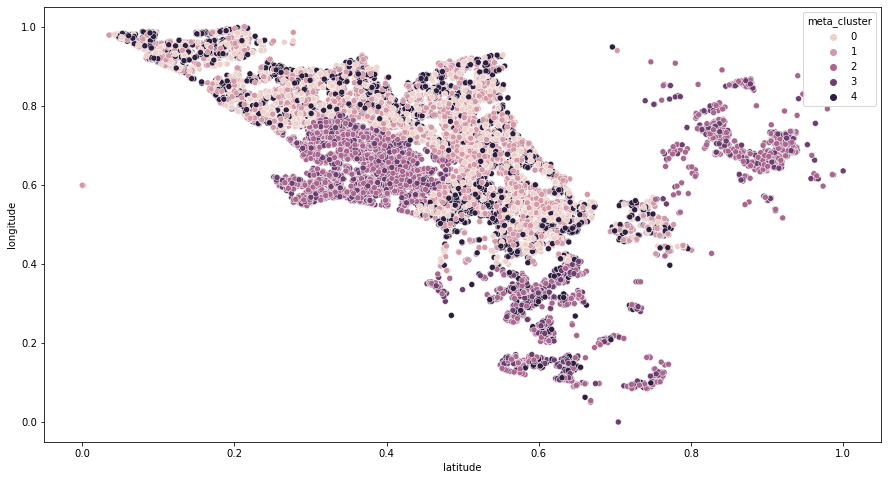

In [43]:
sns.scatterplot(x=train_scaled.latitude, y=train_scaled.longitude, hue=train.meta_cluster)
plt.gcf().set_size_inches(15, 8)

# Regression

In [44]:
X_train = train[['meta_cluster']]
y_train = pd.DataFrame(train_scaled['logerror'])

X_validate = validate[['meta_cluster']]
y_validate = validate['logerror']

X_test = test[['meta_cluster']]
y_test = test['logerror']

KeyError: "None of [Index(['meta_cluster'], dtype='object')] are in the [columns]"

In [39]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train)

# predict train
train_predictions = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, train_predictions)**(1/2)

# predict validate
validate_predictions = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate, validate_predictions)**(1/2)

# predict test
test_predictions = lm.predict(X_test)

rmse_test = mean_squared_error(y_test, test_predictions)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nTest Sample: ", rmse_test)

NameError: name 'LinearRegression' is not defined